In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pt

In [23]:
data = pd.read_csv('AppleStore.csv')
data.head(5)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [24]:
num_cols = [
    'size_bytes',
    'price',
    'rating_count_tot',
    'rating_count_ver',
    'cont_rating',
    'ipadSc_urls.num',
    'lang.num',
    'sup_devices.num'
]

cat_cols = [
    'currency',
    'prime_genre'
]

target_col = 'user_rating'

cols = num_cols + cat_cols + [target_col]

In [25]:
data = data[cols]
data['cont_rating'] = data['cont_rating'].str.slice(0, -1).astype(int)
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,cont_rating,ipadSc_urls.num,lang.num,sup_devices.num,currency,prime_genre,user_rating
0,100788224,3.99,21292,26,4,5,10,38,USD,Games,4.0
1,158578688,0.00,161065,26,4,5,23,37,USD,Productivity,4.0
2,100524032,0.00,188583,2822,4,5,3,37,USD,Weather,3.5
3,128512000,0.00,262241,649,12,5,9,37,USD,Shopping,4.0
4,92774400,0.00,985920,5320,4,5,45,37,USD,Reference,4.5


In [26]:
data.isna().mean()

size_bytes          0.0
price               0.0
rating_count_tot    0.0
rating_count_ver    0.0
cont_rating         0.0
ipadSc_urls.num     0.0
lang.num            0.0
sup_devices.num     0.0
currency            0.0
prime_genre         0.0
user_rating         0.0
dtype: float64

In [27]:
for col in cat_cols:
    print (f"{col} DISTRIBUTION")
    print (data[col].value_counts())
    print()

currency DISTRIBUTION
USD    7197
Name: currency, dtype: int64

prime_genre DISTRIBUTION
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64



In [28]:
data = data.drop(columns=['currency'])
cat_cols.remove('currency')
cols = num_cols + cat_cols + [target_col]

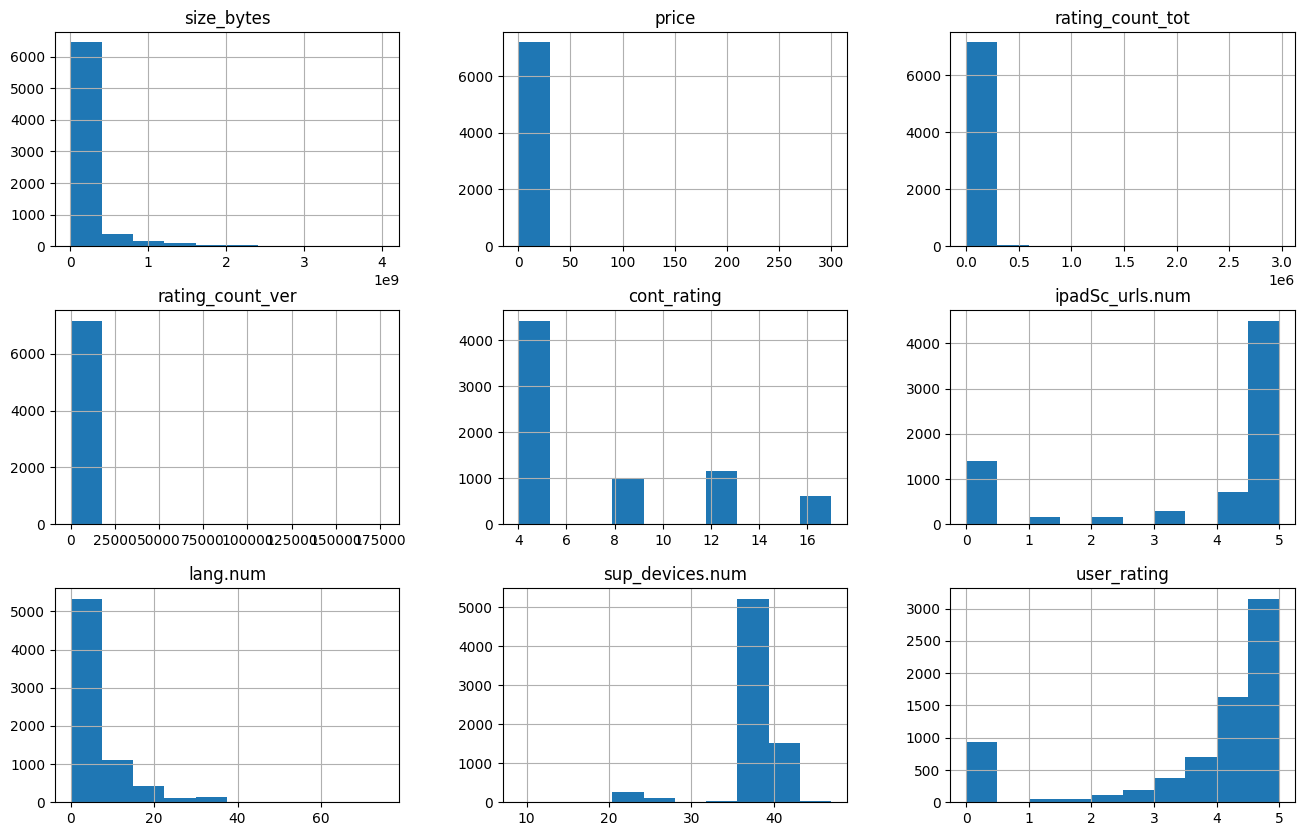

In [29]:
data.hist(column=cols, figsize=[16, 10]);

In [30]:
data.drop(columns='prime_genre').corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,size_bytes,price,rating_count_tot,rating_count_ver,cont_rating,ipadSc_urls.num,lang.num,sup_devices.num,user_rating
size_bytes,1.00,0.18,0.00,0.01,0.14,0.15,0.00,-0.12,0.07
price,0.18,1.00,-0.04,-0.02,-0.03,0.07,-0.01,-0.12,0.05
rating_count_tot,0.00,-0.04,1.00,0.16,0.01,0.02,0.14,0.01,0.08
rating_count_ver,0.01,-0.02,0.16,1.00,0.00,0.02,0.01,0.04,0.07
cont_rating,0.14,-0.03,0.01,0.00,1.00,-0.11,-0.07,0.02,-0.10
ipadSc_urls.num,0.15,0.07,0.02,0.02,-0.11,1.00,0.09,-0.04,0.27
lang.num,0.00,-0.01,0.14,0.01,-0.07,0.09,1.00,-0.04,0.17
sup_devices.num,-0.12,-0.12,0.01,0.04,0.02,-0.04,-0.04,1.00,-0.04
user_rating,0.07,0.05,0.08,0.07,-0.10,0.27,0.17,-0.04,1.00


In [31]:
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,cont_rating,ipadSc_urls.num,lang.num,sup_devices.num,prime_genre,user_rating
0,100788224,3.99,21292,26,4,5,10,38,Games,4.0
1,158578688,0.00,161065,26,4,5,23,37,Productivity,4.0
2,100524032,0.00,188583,2822,4,5,3,37,Weather,3.5
3,128512000,0.00,262241,649,12,5,9,37,Shopping,4.0
4,92774400,0.00,985920,5320,4,5,45,37,Reference,4.5


array([[<Axes: xlabel='size_bytes', ylabel='size_bytes'>,
        <Axes: xlabel='price', ylabel='size_bytes'>,
        <Axes: xlabel='rating_count_tot', ylabel='size_bytes'>,
        <Axes: xlabel='rating_count_ver', ylabel='size_bytes'>,
        <Axes: xlabel='cont_rating', ylabel='size_bytes'>,
        <Axes: xlabel='ipadSc_urls.num', ylabel='size_bytes'>,
        <Axes: xlabel='lang.num', ylabel='size_bytes'>,
        <Axes: xlabel='sup_devices.num', ylabel='size_bytes'>,
        <Axes: xlabel='user_rating', ylabel='size_bytes'>],
       [<Axes: xlabel='size_bytes', ylabel='price'>,
        <Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='rating_count_tot', ylabel='price'>,
        <Axes: xlabel='rating_count_ver', ylabel='price'>,
        <Axes: xlabel='cont_rating', ylabel='price'>,
        <Axes: xlabel='ipadSc_urls.num', ylabel='price'>,
        <Axes: xlabel='lang.num', ylabel='price'>,
        <Axes: xlabel='sup_devices.num', ylabel='price'>,
        <Axes: xlabe

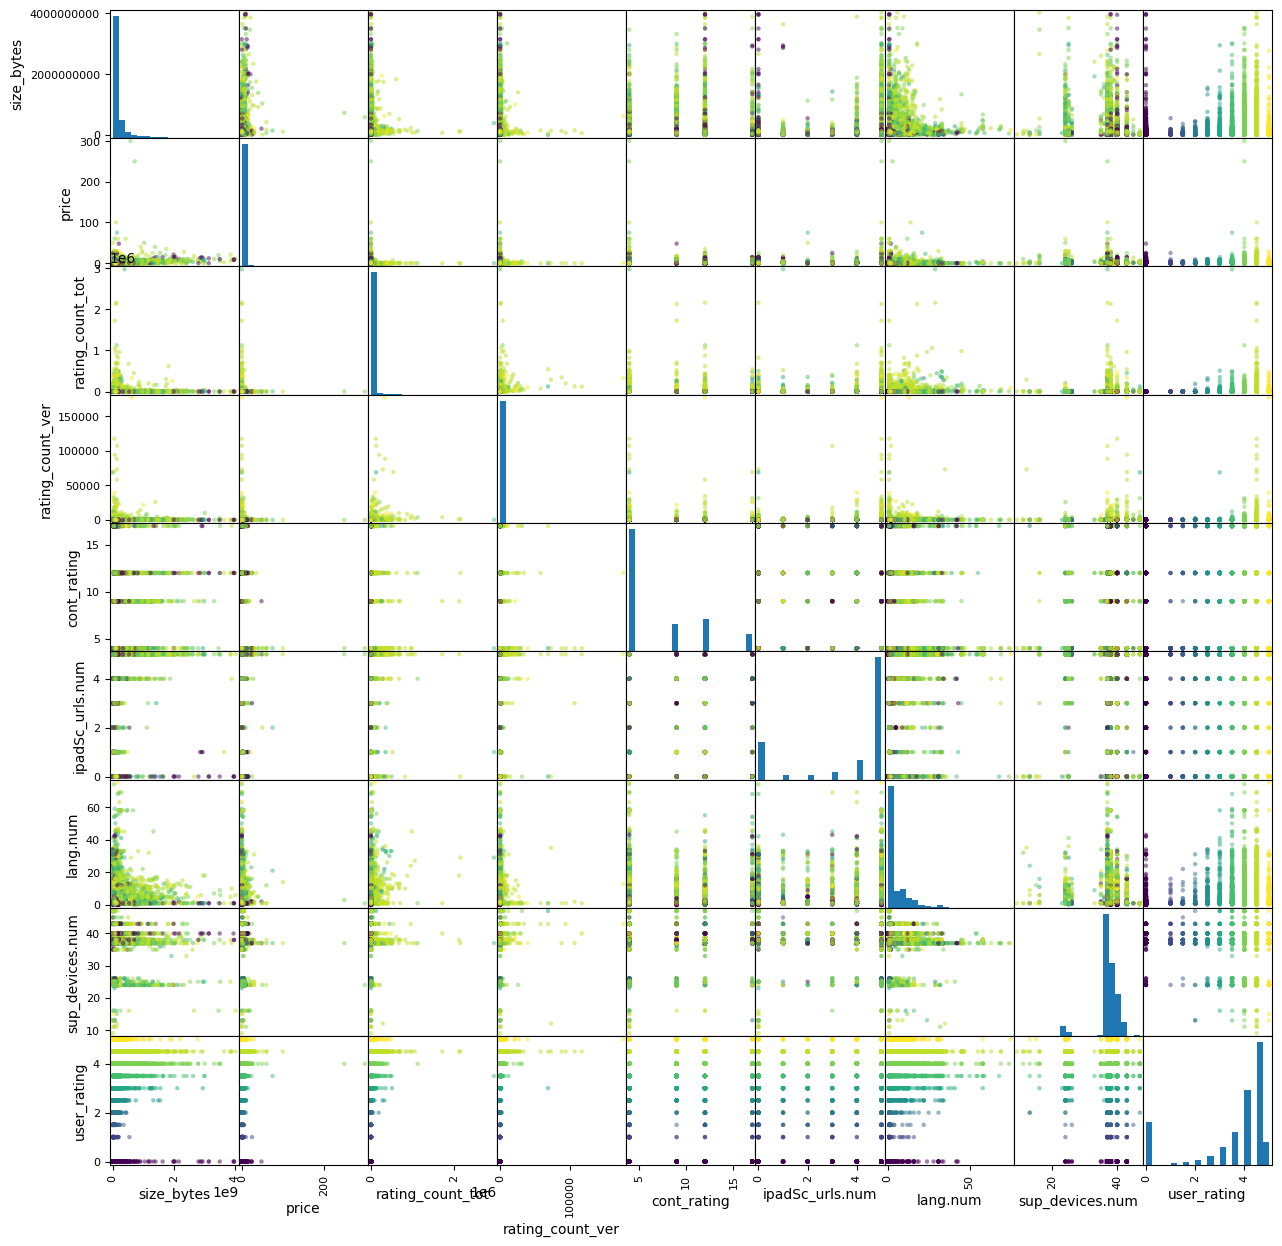

In [32]:
pd.plotting.scatter_matrix(data, c=data[target_col], figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=10)

In [33]:
data['is_free'] = data['price'] == 0
cat_cols.append('is_free')
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,cont_rating,ipadSc_urls.num,lang.num,sup_devices.num,prime_genre,user_rating,is_free
0,100788224,3.99,21292,26,4,5,10,38,Games,4.0,False
1,158578688,0.00,161065,26,4,5,23,37,Productivity,4.0,True
2,100524032,0.00,188583,2822,4,5,3,37,Weather,3.5,True
3,128512000,0.00,262241,649,12,5,9,37,Shopping,4.0,True
4,92774400,0.00,985920,5320,4,5,45,37,Reference,4.5,True


In [34]:
a = pd.DataFrame.from_dict({'categorical': ['a', 'b', 'c', 'd']})
a

,categorical
0,a
1,b
2,c
3,d


In [35]:
pd.get_dummies(a)

,categorical_a,categorical_b,categorical_c,categorical_d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


In [36]:
data = pd.get_dummies(data, columns=cat_cols)
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,cont_rating,ipadSc_urls.num,lang.num,sup_devices.num,user_rating,prime_genre_Book,...,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather,is_free_False,is_free_True
0,100788224,3.99,21292,26,4,5,10,38,4.0,0,...,0,0,0,0,0,0,0,0,1,0
1,158578688,0.00,161065,26,4,5,23,37,4.0,0,...,1,0,0,0,0,0,0,0,0,1
2,100524032,0.00,188583,2822,4,5,3,37,3.5,0,...,0,0,0,0,0,0,0,1,0,1
3,128512000,0.00,262241,649,12,5,9,37,4.0,0,...,0,0,1,0,0,0,0,0,0,1
4,92774400,0.00,985920,5320,4,5,45,37,4.5,0,...,0,1,0,0,0,0,0,0,0,1


In [38]:
cat_cols_new = []
for col_name in cat_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(col_name), data.columns))
cat_cols = cat_cols_new
print(cat_cols)

['prime_genre_Book', 'prime_genre_Business', 'prime_genre_Catalogs', 'prime_genre_Education', 'prime_genre_Entertainment', 'prime_genre_Finance', 'prime_genre_Food & Drink', 'prime_genre_Games', 'prime_genre_Health & Fitness', 'prime_genre_Lifestyle', 'prime_genre_Medical', 'prime_genre_Music', 'prime_genre_Navigation', 'prime_genre_News', 'prime_genre_Photo & Video', 'prime_genre_Productivity', 'prime_genre_Reference', 'prime_genre_Shopping', 'prime_genre_Social Networking', 'prime_genre_Sports', 'prime_genre_Travel', 'prime_genre_Utilities', 'prime_genre_Weather', 'is_free_False', 'is_free_True']


In [41]:
from sklearn.preprocessing import StandardScaler

pca = StandardScaler()
pca.fit(data[num_cols + cat_cols])
X = pca.transform(data[num_cols + cat_cols])
#X = pca.fit_transform(data[num_cols + cat_cols])


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data[target_col], test_size=0.2)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [45]:
def print_metrics(y_preds, y):
    print(f'R^2: {r2_score(y_preds, y)}')
    print(f'MSE: {mean_squared_error(y_preds, y)}')

In [55]:
X_test[0:2]

array([[-0.50980839, -0.29596024, -0.17023902, -0.11743685, -0.7145476 ,
         0.65105067, -0.56003026, -0.09680849, -0.12573005, -0.08934872,
        26.80858072, -0.25917334, -0.28338351, -0.12108816, -0.09397314,
        -1.07611384, -0.16016238, -0.14288752, -0.05662174, -0.13981957,
        -0.08020391, -0.10261944, -0.2257516 , -0.15924741, -0.09472266,
        -0.13131571, -0.15412766, -0.12686558, -0.1066902 , -0.18891424,
        -0.10052494, -0.88000471,  0.88000471],
       [-0.28179729,  0.04522548, -0.17019941, -0.11667158, -0.7145476 ,
         0.65105067, -0.56003026,  0.70587664, -0.12573005, -0.08934872,
        -0.03730149, -0.25917334, -0.28338351, -0.12108816, -0.09397314,
         0.92926972, -0.16016238, -0.14288752, -0.05662174, -0.13981957,
        -0.08020391, -0.10261944, -0.2257516 , -0.15924741, -0.09472266,
        -0.13131571, -0.15412766, -0.12686558, -0.1066902 , -0.18891424,
        -0.10052494,  1.13635756, -1.13635756]])

In [52]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)[0:5]
#print_metrics(lr.predict(X_test), y_test)

array([2.65294276, 3.90313326, 4.3162192 , 3.81133639, 3.74883639])

In [49]:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)

print_metrics(knn.predict(X_test), y_test)

R^2: -0.7018343451577076
MSE: 2.0107421875
